In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Birth Weights 

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = baby.select('Birth Weight', 'Maternal Smoker')
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


C:\Users\schoend\Anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


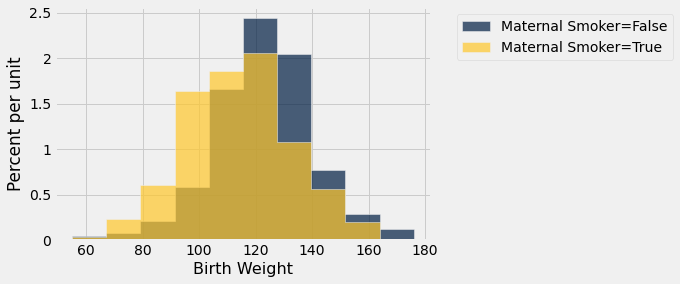

In [5]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [6]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [7]:
def diff_between_group_means(tbl):
    means = tbl.group('Maternal Smoker', np.average)
    return means.column(1).item(0) - means.column(1).item(1)

In [8]:
observed_diff = diff_between_group_means(smoking_and_birthweight)
observed_diff

9.266142572024918

In [9]:
# PLAN:
# Shuffle birth weights
# Assign some to group A and some to group B
# Find difference between averages of the two groups (statistic)
# Repeat

In [10]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


In [11]:
smoking = smoking_and_birthweight.select('Maternal Smoker')
smoking

Maternal Smoker
False
False
True
True
False
False
False
False
True
False


In [12]:
# Shuffle birth weights
weights = smoking_and_birthweight.select('Birth Weight')

In [13]:
# Shuffle birth weights
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_weights

array([129,  96, 136, ..., 113, 126, 103])

In [14]:
# Assign some to group A and some to group B
simulated = smoking.with_column('Shuffled weights', shuffled_weights)
simulated

Maternal Smoker,Shuffled weights
False,129
False,96
True,136
True,123
False,120
False,115
False,153
False,129
True,114
False,149


In [15]:
# Find difference between averages of the two groups (statistic)
simulated_diff = diff_between_group_means(simulated)
simulated_diff

-2.2776452305864154

In [16]:
# Repeat
diffs = make_array()
for i in np.arange(2000):
    shuffled_weights = weights.sample(with_replacement=False).column(0)
    simulated = smoking.with_column('Shuffled weights', shuffled_weights)
    diff = diff_between_group_means(simulated)
    diffs = np.append(diffs, diff)

diffs

array([ 0.07618569, -1.59439036, -0.95763975, ...,  2.49798437,
       -0.62853269,  0.28008897])

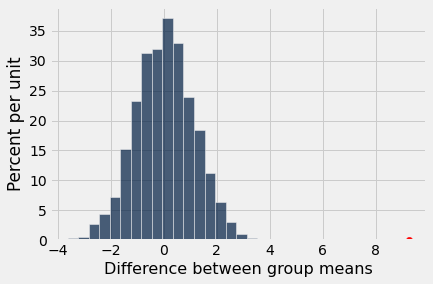

In [17]:
Table().with_column('Difference between group means', diffs).hist(bins=20)
plots.scatter(observed_diff, 0, color = 'red', s = 40);

## Deflategate ##

In [ ]:
football = Table.read_table('deflategate.csv')
football.show()

In [ ]:
combined = (football.column('Blakeman')+football.column('Prioleau'))/2
football = football.drop('Blakeman', 'Prioleau').with_column(
    'Combined', 
    combined)
football.show()

In [ ]:
np.ones(5)

In [ ]:
initial_pressure = np.append(12.5 * np.ones(11), 13 * np.ones(4))
initial_pressure

In [ ]:
drop_values = initial_pressure - football.column(1)

In [ ]:
football = football.drop('Combined').with_column('Drop', drop_values)

In [ ]:
football.show()

In [ ]:
means = football.group('Team', np.average)
means

In [ ]:
observed_difference = means.column(1).item(0) - means.column(1).item(1)
observed_difference

In [ ]:
def diff_between_means(tbl):
    means = tbl.group('Team', np.average).column(1)
    return means.item(0) - means.item(1)

In [ ]:
drops = football.select('Drop')

In [ ]:
shuffled_drops = drops.sample(with_replacement = False).column(0)
shuffled_drops

In [ ]:
simulated_football = football.with_column('Drop', shuffled_drops)
simulated_football.show(3)

In [ ]:
diff_between_means(simulated_football)

In [ ]:
differences = make_array()

for i in np.arange(5000):
    shuffled_drops = drops.sample(with_replacement = False).column(0)
    simulated_football = football.with_column('Drop', shuffled_drops)
    new_diff = diff_between_means(simulated_football)
    differences = np.append(differences, new_diff)

In [ ]:
Table().with_column('Difference Between Means', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=40);

In [ ]:
np.average(differences <= observed_difference)

Analyzing RCTs 

In [ ]:
#See Inferential Thinking textbook Section 12.3

In [ ]:
bta = Table.read_table('bta.csv')
bta.show()

In [ ]:
bta = Table.read_table('bta.csv')
bta.show()

In [ ]:
bta.group('Group', sum)

In [ ]:
bta.group('Group', np.average)

In [ ]:
observed_outcomes = Table.read_table('observed_outcomes.csv')
observed_outcomes.show()

In [ ]:
bta.group('Group', np.average).column(1)

In [ ]:
abs(0.125 - 0.6)

In [ ]:
def distance_between_group_proportions(tbl):
    proportions = tbl.group('Group', np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [ ]:
observed_distance = distance_between_group_proportions(bta)
observed_distance

In [ ]:
labels = bta.select('Group')
results = bta.select('Result')

In [ ]:
# Repeat
distances = make_array()
for i in np.arange(2000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    simulated = labels.with_column('Shuffled results', shuffled_results)
    distance = distance_between_group_proportions(simulated)
    distances = np.append(distances, distance)

distances

In [ ]:
Table().with_column('Distance', distances).hist(bins = np.arange(0, 1, 0.1))
plots.scatter(observed_distance, 0, color='red', s=40);

In [ ]:
np.average(distances >= observed_distance)